In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.lines as lines
import scipy.integrate as integrate
import scipy as sp
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy import stats
import time
import random
import math
import pandas as pd

In [4]:
# Say, "the default sans-serif font is COMIC SANS"
plt.rcParams['font.serif'] = "Garamond"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "serif"
#set default font size
plt.rcParams.update({'font.size': 22})

#set default figure size

plt.rcParams.update({'figure.figsize': (10, 7)})

#set default line width

plt.rcParams.update({'lines.linewidth': 2})

#set default line style

plt.rcParams.update({'lines.linestyle': '-'})




#set default grid style

plt.rcParams.update({'axes.grid': True, 'grid.color': 'b', 'grid.alpha': 0.5, 'grid.linestyle': '-.'})

#set default grid style

plt.rcParams.update({'axes.grid': True, 'grid.color': 'b', 'grid.alpha': 0.5, 'grid.linestyle': '-.'})

#set default axis line width

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define base color
base_color = ('darkred')  

# Generate complementary colors
complementary_colors = []
for i in range(5):
    hue_shift = i * 50  # Increase hue in steps of 36 degrees
    base_rgb = mcolors.to_rgb(base_color)
    shifted_hue = (base_rgb[0] + hue_shift / 360) % 1.0  # Ensure hue stays within [0, 1)
    new_color = mcolors.hsv_to_rgb((shifted_hue, base_rgb[1], base_rgb[2]))
    complementary_colors.append(new_color)

# Update the color cycle in rcParams
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=complementary_colors)

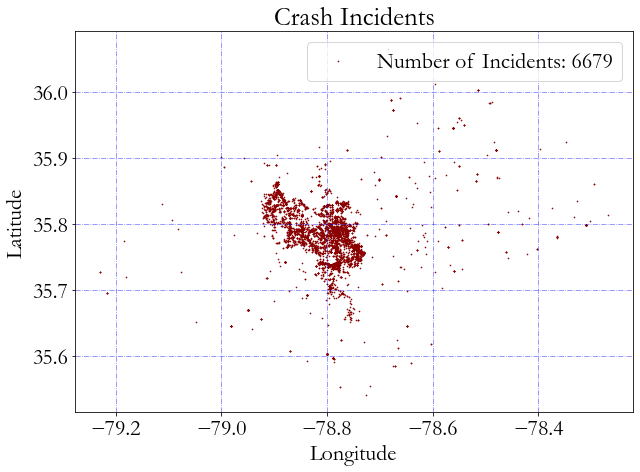

In [5]:
df = pd.read_csv('cpd-crash-incidents.csv', sep=';')
lon = df['lon']
lat = df['lat']
date = df['crash_date']


plt.scatter(lon, lat, s=0.4, label = f'Number of Incidents: {len(lon[-np.isnan(lon)])}', color = 'darkred')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crash Incidents')
plt.legend()

plt.show()



No handles with labels found to put in legend.


23458


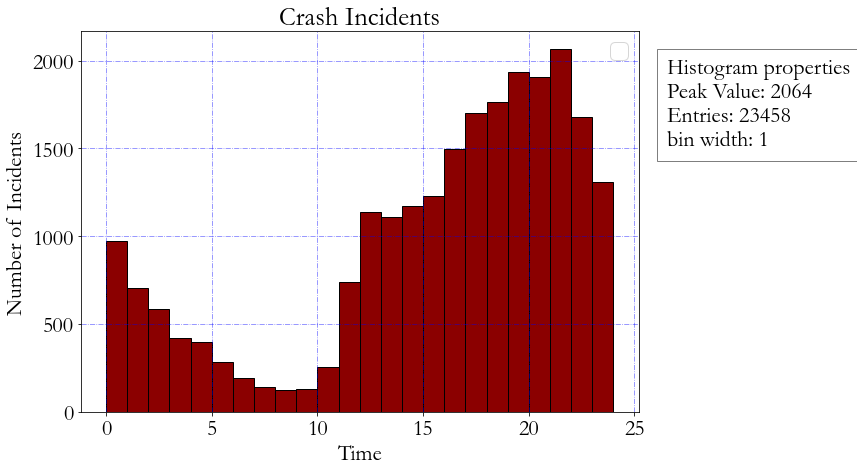

In [6]:

len(date)
times = [dat.split('T')[1][:5] for dat in date]
print(len(times))
hour = np.array([time.split(':')[0] for time in times], dtype=float)

minute = np.array([time.split(':')[1] for time in times], dtype=float)/60

hour = hour + minute



x_min = 0
x_max = 24
Nbins = 24
bin_width = 1
counts, bins = np.histogram(hour, bins = Nbins, range = (x_min, x_max))

bin_centers = (bins[1:] + bins[:-1])/2

plt.bar(bin_centers, counts, width = bin_width, color = 'darkred', edgecolor = 'black')

text_for_plot = f'Histogram properties\nPeak Value: {np.max(counts)} \nEntries: {len(hour)} \nbin width: {bin_width}'

text_box_properties = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10, 'edgecolor': 'black'}

plt.text(1.05, 0.7, text_for_plot, transform = plt.gca().transAxes, bbox = text_box_properties)






plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.title('Crash Incidents')
plt.show()



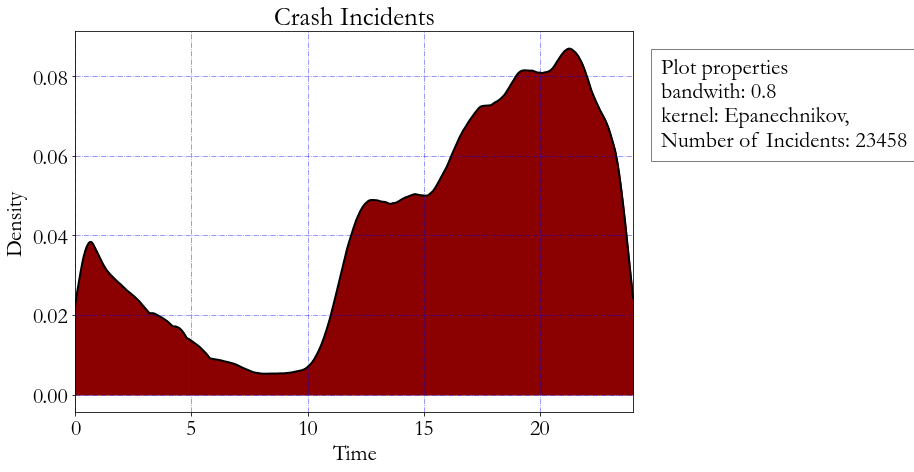

In [7]:
#epichov kernal density estimation
from sklearn.neighbors import KernelDensity
bandwidth = 0.8
X = np.array([hour]).T
kdee = KernelDensity(kernel='epanechnikov', bandwidth=0.8).fit(X)
x = np.linspace(0, 24, 1000)

plt.plot(x,np.exp(kdee.score_samples(x.reshape(-1, 1))))
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Crash Incidents')
plt.fill_between(x, np.exp(kdee.score_samples(x.reshape(-1, 1))), alpha=1, color = 'darkred')
plt.xlim(0, 24)
text_for_plot = f'Plot properties\nbandwith: {bandwidth}\nkernel: Epanechnikov, \nNumber of Incidents: {len(hour)}'
text_box_properties = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10, 'edgecolor': 'black'}
plt.text(1.05, 0.7, text_for_plot, transform = plt.gca().transAxes, bbox = text_box_properties)
plt.show()


In [8]:
x1 = np.linspace(10, 22, 1000)
ranges = []
integral = []
for i in range(1000):
    x2 = np.linspace(x1[i],x1[i]+2, 1000)
    ranges.append([x1[i], x1[i]+2])
    integral.append(np.trapz(np.exp(kdee.score_samples(x2.reshape(-1, 1))), x2))
    print(i)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

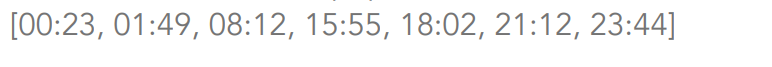

In [9]:
list_hour = [0,1,8,15,18,21,23]
min_hour = np.array([23, 49, 12, 55,2,12,44])/60
list_hour = np.array(list_hour) + min_hour
bandwidth = 0.8
N = 1000



In [10]:
np.argmax(integral)
print(np.round(ranges[np.argmax(integral)],2))


[19.96 21.96]


In [11]:
mask = (hour > ranges[np.argmax(integral)][0]) & (hour < ranges[np.argmax(integral)][1])
reduced_crashes = len(hour[mask])*0.1
print(f'Number of Incidents in the two ours: {len(hour[mask])}')
print(f'Reduced number of crashes 10%: {reduced_crashes}')
print(f'Number of incidents = {len(hour)}')
print(f'{np.round(len(hour[mask])*0.1/len(hour),3)}% of the incidents are in the two hours')
print(f'Peak time: {np.round(ranges[np.argmax(integral)],2)}')

Number of Incidents in the two ours: 3986
Reduced number of crashes 10%: 398.6
Number of incidents = 23458
0.017% of the incidents are in the two hours
Peak time: [19.96 21.96]


In [12]:

mask2 = lon.astype(float) == True


In [13]:
nan_mask = ~ np.isnan(lon)
nan_mask1 = ~ np.isnan(lat)
lon = lon[nan_mask]
#lat = lat[nan_mask] 
lat = lat[nan_mask1]


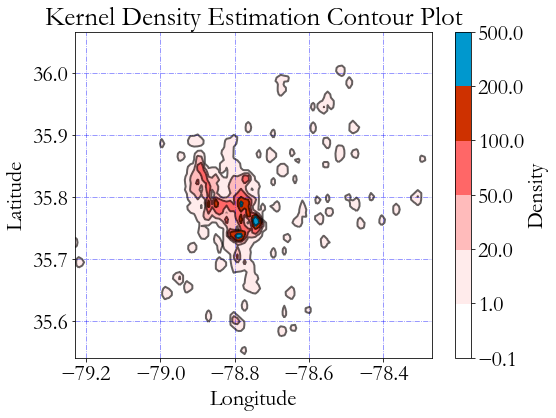

In [94]:
from sklearn.neighbors import KernelDensity
from matplotlib.colors import LinearSegmentedColormap

data = np.column_stack((lon, lat))

kde = KernelDensity(bandwidth=0.01, kernel='epanechnikov')
kde.fit(data)
x_grid, y_grid = np.meshgrid(np.linspace(lon.min(), lon.max(), 100),
                              np.linspace(lat.min(), lat.max(), 100))
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
z = np.exp(kde.score_samples(grid_points))

z_grid = z.reshape(x_grid.shape)

custom_levels = [-0.1,1, 20, 50, 100, 200, 500]
colors = [(1,1,1),(1, 0, 0), (0, 1, 0), (0, 0.5, 1), (0, 0, 1)]
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)
plt.figure(figsize=(8, 6))
#plt.xlim(-79, -78.6)
#plt.ylim(35.5, 35.9)

# Plot filled contour plot with specified levels
contourf = plt.contourf(x_grid, y_grid, z_grid, cmap=cmap, levels=custom_levels, alpha=1)

# Add contour lines with black color
contour = plt.contour(x_grid, y_grid, z_grid, colors='black', levels=custom_levels, alpha=0.6, linestyles='solid')

plt.colorbar(contourf, label='Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kernel Density Estimation Contour Plot')
plt.show()





In [108]:




# Define the range over which you want to integrate the KDE
lon_range = (min(lon), max(lon))  # Specify your desired longitude range
lat_range = (min(lat), max(lat))  # Specify your desired latitude range

# Generate a grid of points within the specified range
x_grid, y_grid = np.meshgrid(np.linspace(lon_range[0], lon_range[1], 100),
                              np.linspace(lat_range[0], lat_range[1], 100))
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Evaluate the KDE at the grid points
z = np.exp(kde.score_samples(grid_points))

# Reshape the KDE values to match the grid shape
z_grid = z.reshape(x_grid.shape)

# Integrate the KDE within the specified range
b = np.sum(z_grid)

print("Integrated density within the specified range:", integrated_density)


Integrated density within the specified range: 6986.647382051439


In [109]:
lon_range = (-78.76, 78.72)  # Specify your desired longitude range
lat_range = (35.74, 35.78)  # Specify your desired latitude range
# Generate a grid of points within the specified range
x_grid, y_grid = np.meshgrid(np.linspace(lon_range[0], lon_range[1], 100),
                              np.linspace(lat_range[0], lat_range[1], 100))
grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Evaluate the KDE at the grid points
z = np.exp(kde.score_samples(grid_points))

# Reshape the KDE values to match the grid shape
z_grid = z.reshape(x_grid.shape)

# Integrate the KDE within the specified range
x = np.sum(z_grid)

print("Integrated density within the specified range:", integrated_density)


Integrated density within the specified range: 6986.647382051439


In [111]:

x/b

0.36166705358553497

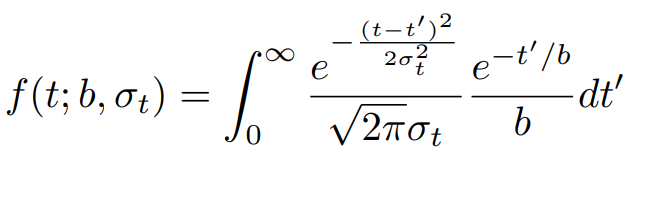

In [26]:
df = pd.read_csv('data3.txt', header=None, sep=';')

data = np.array(df[0])



NameError: name 'np' is not defined